In [13]:
import numpy as np
import pandas as pd
import Funciones_sismos as BN
from scipy.linalg import eigh
import matplotlib.pyplot as plt

In [14]:
E = 1900000   #T/m^2
gdl = 10
col = 0.6   #m
num_col = 9
h = 3 #m
inercia_efectiva = 1
I = np.ones(gdl)*((col**4)/12)*inercia_efectiva #m**4
H = np.ones(gdl)*h #m
g = 9.8  #m/(s**2)
m_piso = 111 #Tons
m = np.ones(gdl)*m_piso    #T*(s**2)*(m**-1)
r = np.ones(gdl)
coef_castigo = 1
tipo = 1
vector = 0

zona = 5
suelo = 'C'
fip = 1
fie = 1
fa = 1.2
fd = 1.11
fs = 1.11
n = 2.48
z = 0.4     #Para un TR475 años
Imp = 1   #Importancia
rr = 1
R = 6

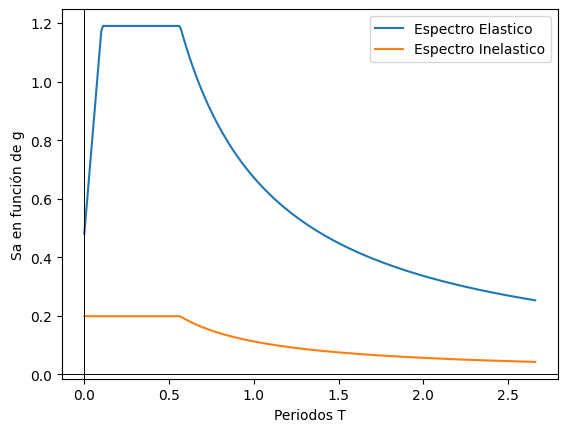

In [15]:
Spec, SpecI, Tmp = BN.Spec_NEC(n, z, fa, fd, fs, rr, Imp, R, fip, fie)

fig, ax = plt.subplots()
plt.plot(Tmp, Spec, label='Espectro Elastico')
plt.plot(Tmp, SpecI, label='Espectro Inelastico')
ax.axhline(0, color='black', linewidth=0.7)
ax.axvline(0, color='black', linewidth=0.7)
ax.set_xlabel('Periodos T')
ax.set_ylabel('Sa en función de g')
plt.legend()
plt.show()

In [16]:
#Matrices de Masa y Rigidez

K, M = BN.K_M(num_col, H, E, tipo, I, vector, m, coef_castigo)
K_tbl = pd.DataFrame(K)
display(K_tbl.style.set_caption('Matriz de rigidez'))

,0,1,2,3,4,5,6,7,8,9
0,164160.000000,-82080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-82080.000000,164160.000000,-82080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-82080.000000,164160.000000,-82080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,-82080.000000,164160.000000,-82080.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-82080.000000,164160.000000,-82080.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,-82080.000000,164160.000000,-82080.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,-82080.000000,164160.000000,-82080.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-82080.000000,164160.000000,-82080.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-82080.000000,164160.000000,-82080.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-82080.000000,82080.000000


In [17]:
M_tbl = pd.DataFrame(M)
display(M_tbl.style.set_caption('Matriz de masas (Tons)'))

,0,1,2,3,4,5,6,7,8,9
0,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.000000


In [18]:
#EIGENVECTORES Y EIGENVALORES

D, V = eigh(K, M)
w = np.sqrt(D)
T = 2*np.pi/w

df_wTD = pd.DataFrame({'w': w, 'T': T, 'D': D})
display(df_wTD)

,w,T,D
0,4.064271,1.545956,16.518302
1,12.102025,0.519185,146.459015
2,19.869440,0.316224,394.794637
3,27.193004,0.231059,739.459459
4,33.909121,0.185295,1149.828500
5,39.867765,0.157601,1589.438668
6,44.935828,0.139826,2019.228672
7,49.000100,0.128228,2401.009783
8,51.969790,0.120901,2700.859074
9,53.778561,0.116834,2892.133620


In [19]:
tbl_V = pd.DataFrame(V)
display(tbl_V.style.set_caption('Modos de vibracion:'))

,0,1,2,3,4,5,6,7,8,9
0,0.006174,-0.017973,0.028176,0.035875,-0.040386,-0.041309,0.038561,0.032387,-0.023335,-0.012210
1,0.012210,-0.032387,0.041309,0.035875,-0.017973,0.006174,-0.028176,-0.040386,0.038561,0.023335
2,0.017973,-0.040386,0.032387,0.000000,0.032387,0.040386,-0.017973,0.017973,-0.040386,-0.032387
3,0.023335,-0.040386,0.006174,-0.035875,0.032387,-0.012210,0.041309,0.017973,0.028176,0.038561
4,0.028176,-0.032387,-0.023335,-0.035875,-0.017973,-0.038561,-0.012210,-0.040386,-0.006174,-0.041309
5,0.032387,-0.017973,-0.040386,0.000000,-0.040386,0.017973,-0.032387,0.032387,-0.017973,0.040386
6,0.035875,-0.000000,-0.035875,0.035875,-0.000000,0.035875,0.035875,0.000000,0.035875,-0.035875
7,0.038561,0.017973,-0.012210,0.035875,0.040386,-0.023335,0.006174,-0.032387,-0.041309,0.028176
8,0.040386,0.032387,0.017973,-0.000000,0.017973,-0.032387,-0.040386,0.040386,0.032387,-0.017973
9,0.041309,0.040386,0.038561,-0.035875,-0.032387,0.028176,0.023335,-0.017973,-0.012210,0.006174


In [20]:
#Valor de aceleraciones espectrales correpondiente a T [Fracción de la gravedad]

Lw = np.zeros(len(T))
for i in range(len(T)):
    Lw[i] = V[:, i].T @ M @ r

df_Lw = pd.DataFrame(Lw, columns=["Lw"])
display(df_Lw)

,Lw
0,30.678932
1,-10.072876
2,5.857930
3,3.982103
4,-2.882940
5,-2.133223
6,1.567478
7,1.107173
8,-0.709169
9,-0.346529


In [21]:
#Factor de excitación sísmica modal

MT = np.sum(np.diag(M))
M_e = np.zeros(len(T))

for i in range(len(T)):
    M_e[i] = ((Lw[i]**2) / MT) * 100

df_M_e = pd.DataFrame(M_e)
display(df_M_e.style.set_caption('Masas efectivas'))

,0
0,84.792512
1,9.140795
2,3.091472
3,1.428571
4,0.748770
5,0.409968
6,0.221350
7,0.110435
8,0.045308
9,0.010818


In [22]:
#Masa efectiva [%]

M_eacum = []
M_eacum.append(M_e[0])

for i in range(len(T)-1):
    M_eacum.append(M_eacum[i] + M_e[i+1])

df_M_eacum = pd.DataFrame(M_eacum)
display(df_M_eacum.style.set_caption('Masas efectivas acumuladas'))
#b = int(input("Número de modos de vibración para la superposición (ver M_eacum al 90%): "))

,0
0,84.792512
1,93.933307
2,97.024779
3,98.453351
4,99.202120
5,99.612088
6,99.833438
7,99.943874
8,99.989182
9,100.000000
